In [1]:
import comat

import pandas as pd
import numpy as np
#data_path = config_cat_embedding.paths['data']


badd = pd.read_csv('C:\\dev\\3_categorical_embedding_3rd\\data\\adult.csv', sep=',')

In [2]:
target = badd.income

In [3]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(badd,target,test_size=0.2, random_state=1500)


In [4]:
def bank_data_prep(adult_data):
    '''
    input: data frame. here the data propressing is customized for bank data
    '''
    #check the NA values in bankdata
    #print('check the NAs in adult_data', adult_data.isnull().sum())
      
   # adult_data.drop(re_cols,axis=1,inplace=True)
    # set up visualization 
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', None)
    
    #remove duplicate features eduational-num
    re_cols=['educational-num']
    
    adult_data.drop(re_cols,axis=1, inplace=True)
    
    #change letters to strings
    adult_data = adult_data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
    #adult_data.info()
    #adult_data.describe()
    #replace "?" by na
    adult_data.isin(['?']).sum()
    adult_data.replace('?',np.nan,inplace=True)
    
    #remove NAs
    adult_data.dropna(inplace=True)
    

    # Get all categorical features
    cat_columns = list(adult_data.columns[adult_data.dtypes=='object'])
    cat_columns.remove('income')
    #dummy target variable
    adult_data['y'] =  adult_data['income'].map({'<=50K': 0, '>50K': 1})
    adult_data.drop('income',axis=1, inplace=True)
    
    return(adult_data,cat_columns)

In [5]:
X_train, cat_cols = bank_data_prep(X_train)
X_test, cat_cols = bank_data_prep(X_test)

In [6]:
y_train = X_train.y
y_test = X_test.y

In [7]:
X_train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'y'],
      dtype='object')

In [8]:
X_test.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'y'],
      dtype='object')

In [9]:
X_train.shape

(36182, 14)

In [11]:
col_names=cat_cols

In [12]:
co_ma = comat.create_cooccurrence_matrix_diag(col_names,X_train[col_names])

[[1.25000000e-01 0.00000000e+00 0.00000000e+00 ... 3.82653061e-03
  0.00000000e+00 1.27551020e-04]
 [0.00000000e+00 1.25000000e-01 0.00000000e+00 ... 2.57323832e-03
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.25000000e-01 ... 3.27510917e-03
  0.00000000e+00 0.00000000e+00]
 ...
 [2.23747017e-03 1.93914081e-03 8.94988067e-04 ... 1.25000000e-01
  2.23747017e-04 7.45823389e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.34375000e-02
  1.25000000e-01 0.00000000e+00]
 [6.25000000e-03 0.00000000e+00 0.00000000e+00 ... 6.25000000e-03
  0.00000000e+00 1.25000000e-01]]
                                10th      11th      12th   1st-4th   5th-6th  \
10th                        0.125000  0.000000  0.000000  0.000000  0.000000   
11th                        0.000000  0.125000  0.000000  0.000000  0.000000   
12th                        0.000000  0.000000  0.125000  0.000000  0.000000   
1st-4th                     0.000000  0.000000  0.000000  0.125000  0.000000   


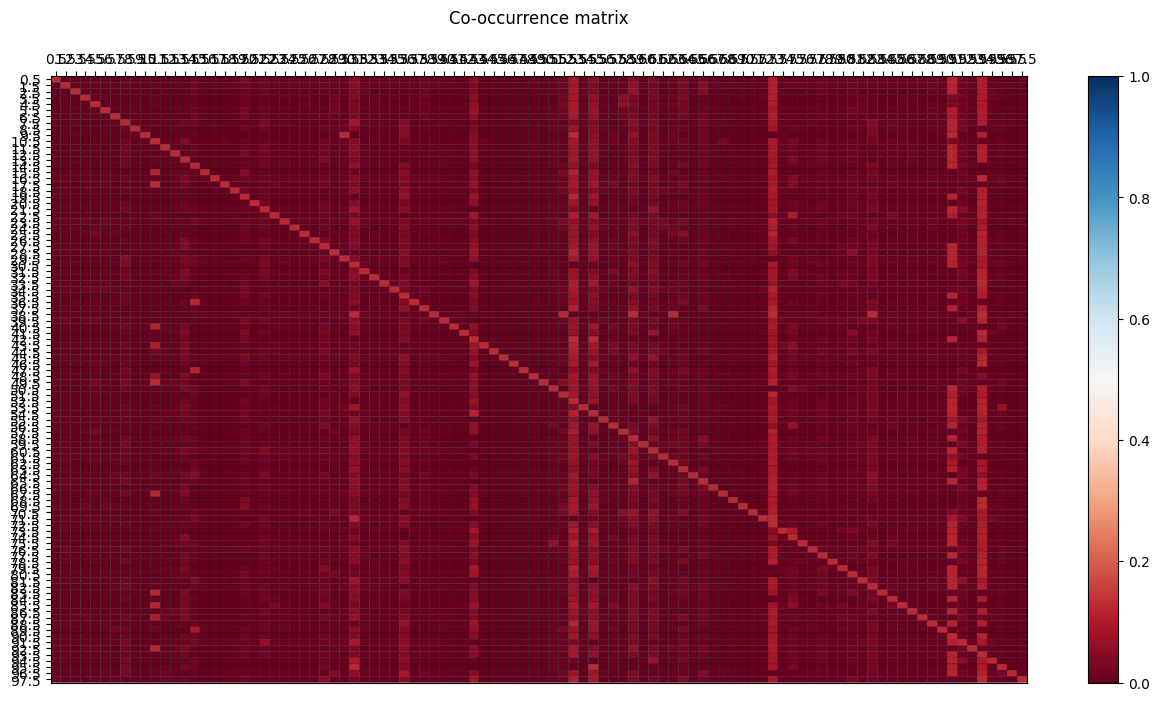

In [13]:
df_co_occ_values = co_ma.values 
 # Plotting
x_axis_size = df_co_occ_values.shape[0]
y_axis_size = df_co_occ_values.shape[1]
title = "Co-occurrence matrix\n"
xlabel= ''#"Labels"
ylabel= ''#"Labels"
#xticklabels = label_header_with_count
#yticklabels = label_header_with_count


comat.heatmap(df_co_occ_values, title, xlabel, ylabel, None, None)

In [14]:
A = co_ma.values


In [15]:
co_ma.columns

Index(['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th',
       'Adm-clerical', 'Amer-Indian-Eskimo', 'Armed-Forces',
       'Asian-Pac-Islander', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Black',
       'Cambodia', 'Canada', 'China', 'Columbia', 'Craft-repair', 'Cuba',
       'Divorced', 'Doctorate', 'Dominican-Republic', 'Ecuador', 'El-Salvador',
       'England', 'Exec-managerial', 'Farming-fishing', 'Federal-gov',
       'Female', 'France', 'Germany', 'Greece', 'Guatemala', 'HS-grad',
       'Haiti', 'Handlers-cleaners', 'Holand-Netherlands', 'Honduras', 'Hong',
       'Hungary', 'Husband', 'India', 'Iran', 'Ireland', 'Italy', 'Jamaica',
       'Japan', 'Laos', 'Local-gov', 'Machine-op-inspct', 'Male',
       'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent',
       'Masters', 'Mexico', 'Never-married', 'Nicaragua', 'Not-in-family',
       'Other', 'Other-relative', 'Other-service',
       'Outlying-US(Guam-USVI-etc)', 'Own-child', 'Peru', 'Philippines

In [16]:
from sklearn.preprocessing import OneHotEncoder


oht = OneHotEncoder()

oht.fit(np.array([co_ma.columns]).T)

oht

OneHotEncoder()

In [17]:
x = oht.transform(np.array([co_ma.columns]).T).toarray()

Adj_t = A

#Adj = A

Adj = A

In [18]:
print(np.shape(x))
np.shape(Adj_t)

(98, 98)


(98, 98)

In [19]:
dimpool = 30
model =comat.DiffPool(98,dimpool,98)

In [20]:

import torch
import torch.nn.functional as F

x_t = torch.as_tensor(x).float()
A_t = torch.as_tensor(Adj).float()
T_t = torch.as_tensor(Adj_t).float()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)



def train(epoch):
    model.train()
    loss_all = 0
    for i in range(epoch):
        optimizer.zero_grad()
        output,s1,o1,s2,o2,linkl = model(x_t, A_t)
        #output,s1,o1,linkl = model(x_t, A_t)
        #print(output)
        #print(A_t)
        loss = F.mse_loss(output, T_t)+ 0.1*linkl 
        loss.backward()
        #print(loss)
        loss_all += float(loss)
        optimizer.step()
    return loss_all / epoch


train(1000)

0.008980604133586895

In [21]:
output, s1, A1,s2,A2,LL = model(x_t, A_t)

In [22]:
pf= X_train
columns_categorical = col_names

In [23]:
pf.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'y'],
      dtype='object')

In [24]:
from tqdm import tqdm_notebook as tqdm

elements = []


for row in tqdm(pf.iterrows()):
    categorical_embeddings = []
    for i in columns_categorical:
        #print(i,row[1][i])
        try:
            categorical_embeddings.append(s1[0,np.argmax(oht.transform([np.array([row[1][i]])]).todense()),:].detach().numpy())
        except:
            categorical_embeddings.append(np.zeros((dimpool)))
    elements.append(np.array(categorical_embeddings))

C:\Users\P70071469\AppData\Local\Temp\ipykernel_29488\3874920952.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for row in tqdm(pf.iterrows()):


0it [00:00, ?it/s]

In [25]:
elements

reshaped_x = (np.reshape(elements,(36182,len(columns_categorical)*dimpool)))

In [26]:
pf.head(3)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,y
26449,28,Private,132078,Bachelors,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,0
4951,42,Private,67243,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,Portugal,0
20619,34,Self-emp-inc,186824,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024,0,40,United-States,1


In [27]:
pf.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'y'],
      dtype='object')

In [28]:
pf.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
marital-status    object
occupation        object
relationship      object
race              object
gender            object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
y                  int64
dtype: object

In [29]:
np.where(pf.dtypes!="object")[0]

array([ 0,  2,  9, 10, 11, 13], dtype=int64)

In [30]:
pf = pf.iloc[:, [ 0,  2,  9, 10, 11, 13]].reset_index()


In [31]:
pf.columns

Index(['index', 'age', 'fnlwgt', 'capital-gain', 'capital-loss',
       'hours-per-week', 'y'],
      dtype='object')

In [32]:
del pf["index"]

In [33]:
del pf["y"]

In [34]:
pf.head()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
0,28,132078,0,0,40
1,42,67243,0,0,50
2,34,186824,15024,0,40
3,38,177134,0,0,40
4,36,76767,0,0,39


In [35]:
reshaped_x.shape

(36182, 240)

In [36]:
reshaped_x
my_data = pd.concat([pf,pd.DataFrame(reshaped_x)],axis=1)


np.shape(my_data)

(36182, 245)

In [37]:
my_data['target'] = y_train.values


my_data.to_csv('bank_diffpool_paired_ttest.csv')

In [38]:

np.shape(my_data)

(36182, 246)

In [39]:
del my_data['target']

In [40]:
np.shape(my_data)

(36182, 245)

In [41]:
from sklearn.model_selection import train_test_split


X_train2, X_test2, y_train2, y_test2 = train_test_split(my_data,y_train,test_size=0.2, random_state=1500)


In [42]:
X_train2.shape

(28945, 245)

In [43]:
X_train2.head(3)

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239
30492,45,102559,0,0,40,0.000000,0.0,0.925108,6.388336,0.000000,6.233241,0.000000,0.898405,6.822282,0.000000,0.0,6.832251,0.000000,6.441359,0.097476,0.000000,0.000000,0.000000,0.000000,6.850381,1.169846,0.000000,0.000000,0.749227,0.000000,0.000000,6.34074,0.000000,0.376127,6.287746,1.470684,1.913340,0.000000,0.000000,0.000000,0.000000,1.794764,0.000000,0.000000,1.18853,1.905223,0.000000,1.626123,0.000000,0.000000,1.785050,0.000000,0.636889,1.086533,0.000000,0.000000,1.930202,0.000000,0.000000,1.769599,1.238472,0.000000,2.368570,0.000000,0.000000,2.805847,0.0,0.0,0.0,3.066633,0.0,0.0,0.0,0.0,3.129537,0.0,0.0,3.181739,0.0,3.539067,2.264238,3.786486,2.968199,3.118641,0.0,0.0,2.969921,3.054178,0.0,3.034657,2.54241,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,2.934161,0.000000,0.085546,0.0,0.0,2.812217,0.000000,0.0,2.666542,0.000000,3.074847,0.157162,0.000000,0.000000,0.000000,0.000000,2.870209,3.098989,0.000000,0.000000,0.0,0.000000,0.000000,3.028308,0.0,0.0,2.912072,0.0,0.0,0.0,0.0,4.698686,0.0,0.0,0.0,2.875341,0.0,0.0,2.789239,0.0,0.472431,4.475042,0.0,4.228738,0.0,0.0,2.472171,3.539596,0.0,4.717881,0.0,0.0,0.0,0.279985,0.0,0.0,0.459242,0.0,3.823451,3.937697,0.0,0.0,0.0,4.020435,3.717664,0.0,0.0,3.759077,0.0,0.0,0.0,0.0,0.228833,0.0,0.077048,0.51036,0.0,1.641392,0.326295,0.0,3.794404,0.0,0.740798,0.0,3.832177,3.877479,0.0,0.429992,0.0,0.0,1.803113,0.0,2.060184,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.7051,0.0,0.590151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.293954,0.581465,1.838531,0.0,0.0,1.819613,0.200880,1.515262,0.634585,0.0,0.0,0.091712,1.298882,0.404775,0.0,0.115339,1.558754,0.0,0.017718,0.0,0.0,0.969023,0.000000,0.323604,0.588811,0.0,0.044083,0.000000,0.000000,0.81637,0.029263,0.539703,0.166752,1.685663,0.233033,0.120276
26342,53,71417,0,0,40,4.686779,0.0,0.000000,0.000000,0.000000,0.000000,0.086779,0.000000,0.000000,4.585463,0.0,0.000000,4.277200,0.000000,0.000000,4.437218,0.063548,4.893595,4.657694,0.000000,0.000000,4.736481,0.000000,0.000000,4.798560,4.530077,0.00000,0.225699,0.000000,0.000000,3.529255,0.000000,0.000000,0.000000,3.975406,0.000000,0.000000,0.000000,0.000000,3.99207,0.000000,0.000000,3.369295,0.000000,4.080305,4.194818,3.311268,3.968944,3.528769,0.000000,0.000000,4.114088,4.210632,0.000000,4.021514,3.937187,0.000000,0.000000,0.000000,0.000000,2.805847,0.0,0.0,0.0,3.066633,0.0,0.0,0.0,0.0,3.129537,0.0,0.0,3.181739,0.0,3.539067,2.264238,3.786486,2.968199,3.118641,0.0,0.0,2.969921,3.054178,0.0,3.034657,2.54241,0.0,0.0,0.0,0.0,5.745162,0.0,0.0,0.000000,1.269031,0.000000,0.0,0.0,0.000000,5.510355,0.0,0.000000,5.514423,0.000000,1.932364,5.882488,0.860942,5.386006,5.795321,0.000000,0.000000,5.462019,1.110422,0.0,5.478757,5.815967,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,4.698686,0.0,0.0,0.0,2.875341,0.0,0.0,2.789239,0.0,0.472431,4.475042,0.0,4.228738,0.0,0.0,2.472171,3.539596,0.0,4.717881,0.0,0.0,0.0,0.279985,0.0,0.0,0.459242,0.0,3.823451,3.937697,0.0,0.0,0.0,4.020435,3.717664,0.0,0.0,3.759077,0.0,0.0,0.0,0.0,0.228833,0.0,0.077048,0.51036,0.0,1.641392,0.326295,0.0,3.794404,0.0,0.740798,0.0,3.832177,3.877479,0.0,0.429992,0.0,0.0,1.803113,0.0,2.060184,0.0,

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,auc, roc_auc_score


log = LogisticRegression(max_iter=1000)


stc = StandardScaler()

X_scaled = stc.fit_transform(X_train2.values)

log.fit(X_scaled,y_train2)

y_pred = log.predict(stc.transform(X_test2.values))
y_pred_prob = log.predict_proba(stc.transform(X_test2.values))

print(confusion_matrix(y_test2,y_pred))
print(classification_report(y_test2,y_pred))

print(roc_auc_score(y_test2,y_pred_prob[:,1]))

[[5053  390]
 [ 684 1110]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      5443
           1       0.74      0.62      0.67      1794

    accuracy                           0.85      7237
   macro avg       0.81      0.77      0.79      7237
weighted avg       0.85      0.85      0.85      7237

0.9055963793001393


In [45]:
test_pf = X_test.copy()

In [46]:
from tqdm import tqdm_notebook as tqdm

elements = []


for row in tqdm(test_pf.iterrows()):
    categorical_embeddings = []
    for i in columns_categorical:
        #print(i,row[1][i])
        try:
            categorical_embeddings.append(s1[0,np.argmax(oht.transform([np.array([row[1][i]])]).todense()),:].detach().numpy())
        except:
            categorical_embeddings.append(np.zeros((dimpool)))
    elements.append(np.array(categorical_embeddings))

C:\Users\P70071469\AppData\Local\Temp\ipykernel_29488\614757573.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for row in tqdm(test_pf.iterrows()):


0it [00:00, ?it/s]

In [47]:
test_pf.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'y'],
      dtype='object')

In [48]:
test_pf.shape

(9040, 14)

In [49]:
test_pf.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
marital-status    object
occupation        object
relationship      object
race              object
gender            object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
y                  int64
dtype: object

In [50]:
reshaped_x_test = (np.reshape(elements,(9040,len(columns_categorical)*dimpool)))

In [51]:
reshaped_x_test.shape

(9040, 240)

In [52]:
test_target = y_test.copy()

In [53]:
test_pf1 = test_pf.iloc[:, [ 0,  2,  9, 10, 11, 13]].reset_index()

test_pf1.head()

,index,age,fnlwgt,capital-gain,capital-loss,hours-per-week,y
0,4558,21,315470,0,0,30,0
1,29230,39,34378,0,0,50,0
2,44859,39,318918,0,0,40,0
3,47877,39,72338,0,0,40,1
4,9973,24,126613,0,0,20,0


In [54]:
test_pf1.shape

(9040, 7)

In [55]:
del test_pf1["index"]

In [56]:
del test_pf1["y"]

In [57]:
test_pf1.head(3)

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
0,21,315470,0,0,30
1,39,34378,0,0,50
2,39,318918,0,0,40


In [58]:
my_test_data = pd.concat([test_pf1,pd.DataFrame(reshaped_x_test)],axis=1)
my_test_data.shape

(9040, 245)

In [59]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,auc, roc_auc_score



y_pred_test = log.predict(stc.transform(my_test_data.values))
y_pred_prob_test = log.predict_proba(stc.transform(my_test_data.values))

print(confusion_matrix(test_target,y_pred_test))
print(classification_report(test_target,y_pred_test, digits=3))

print(roc_auc_score(test_target,y_pred_prob_test[:,1]))

[[6308  508]
 [ 855 1369]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6816
           1       0.73      0.62      0.67      2224

    accuracy                           0.85      9040
   macro avg       0.80      0.77      0.79      9040
weighted avg       0.84      0.85      0.84      9040

0.900242592017935
